<a href="https://colab.research.google.com/github/md-tanvir-0/Machine_Learning/blob/main/MidAssessment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
data = pd.read_csv("/content/drive/MyDrive/Machine Learning/historic_demand_year_2023.csv")
X = data.iloc[:,0:20]  #independent columns
y = data.iloc[:,-1]    #target column i.e price range


In [ ]:
#apply SelectKBest class to extract top 10 best features
bestfeatures = SelectKBest(score_func=chi2, k=10)
fit = bestfeatures.fit(X,y)


In [ ]:
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)

In [ ]:
#concat two dataframes for better visualization
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns

In [ ]:
featureScores

,Specs,Score
0,eleclink_flow,7129.539808
1,settlement_period,398.183906
2,nd,50684.123129
3,tsd,38842.230597
4,england_wales_demand,46019.801514
5,embedded_wind_generation,25493.500630
6,embedded_wind_capacity,12.769123
7,embedded_solar_generation,104344.022787
8,embedded_solar_capacity,28.376714
9,non_bm_stor,16873.341176


In [ ]:
print(featureScores.nlargest(10,'Score'))  #print 10 best features

                        Specs          Score
7   embedded_solar_generation  104344.022787
18                       date   62459.356460
2                          nd   50684.123129
4        england_wales_demand   46019.801514
3                         tsd   38842.230597
5    embedded_wind_generation   25493.500630
10       pump_storage_pumping   24334.583670
9                 non_bm_stor   16873.341176
11                   ifa_flow    7585.349362
13               britned_flow    7140.425284


In [ ]:
import numpy as np
from sklearn.decomposition import PCA

# Generate some sample data
# Replace this with your own dataset
data = np.random.rand(100, 5)  # 100 samples, 5 features

# Create a PCA object with the desired number of components
n_components = 2
pca = PCA(n_components=n_components)

# Fit and transform the data to reduce the dimensionality
reduced_data = pca.fit_transform(data)

# The reduced_data now contains the data with reduced dimensions

# The explained variance ratio tells you how much variance is preserved
explained_variance_ratio = pca.explained_variance_ratio_
print("Explained Variance Ratio:", explained_variance_ratio)

# You can also access the principal components (eigenvectors)
principal_components = pca.components_
print("Principal Components:", principal_components)

# You can associate the feature names with the principal components
principal_components_df = pd.DataFrame(principal_components, columns=feature_names)
print("Principal Components with Feature Names:")
print(principal_components_df)

Explained Variance Ratio: [0.27718241 0.22626064]
Principal Components: [[-0.44779528  0.32571716  0.08395739 -0.5266473   0.63951661]
 [-0.4365563  -0.85289648 -0.21871893 -0.18471596  0.0053135 ]]
Principal Components with Feature Names:
   Feature1  Feature2  Feature3  Feature4  Feature5
0 -0.447795  0.325717  0.083957 -0.526647  0.639517
1 -0.436556 -0.852896 -0.218719 -0.184716  0.005313


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
data = pd.read_csv("/content/drive/MyDrive/Machine Learning/historic_demand_year_2023.csv")
data.head(10)

,eleclink_flow,settlement_period,nd,tsd,england_wales_demand,embedded_wind_generation,embedded_wind_capacity,embedded_solar_generation,embedded_solar_capacity,non_bm_stor,pump_storage_pumping,ifa_flow,ifa2_flow,britned_flow,moyle_flow,east_west_flow,nemo_flow,nsl_flow,date
0,573,1,21043,24680,18995,2815,494,1147,949,570,942,573,251,265,343,588,616,368,6
1,612,2,21756,25289,19730,2793,6545,0,14284,0,1056,1036,904,683,343,389,517,482,26
2,1030,3,21348,25269,19327,2773,6545,0,14284,0,1212,249,983,327,583,381,469,1086,25
3,1115,4,20586,24574,18589,2753,6545,0,14284,0,1237,77,989,84,270,89,668,858,24
4,40,5,19781,24135,17806,2712,6545,0,14284,0,1233,116,903,1164,631,287,370,1411,9
5,1186,6,19077,23505,17105,2671,6545,0,14284,0,1234,716,895,604,1027,486,259,1168,6
6,783,7,18511,22969,16459,2615,6545,0,14284,0,1224,889,895,371,253,895,413,926,28
7,215,8,17803,22278,15691,2558,6545,0,14284,0,1221,1176,894,1099,78,443,340,973,9
8,41,9,17363,21875,15221,2511,6545,0,14284,0,1124,212,811,1053,787,749,625,865,30
9,346,10,17096,21654,14936,2464,6545,0,14284,0,1163,559,804,313,760,1014,276,995,13


In [ ]:
data.iloc[:,1:].describe()

,settlement_period,nd,tsd,england_wales_demand,embedded_wind_generation,embedded_wind_capacity,embedded_solar_generation,embedded_solar_capacity,non_bm_stor,pump_storage_pumping,ifa_flow,ifa2_flow,britned_flow,moyle_flow,east_west_flow,nemo_flow,nsl_flow,date
count,13006.000000,13006.000000,13006.000000,13006.000000,13006.000000,13006.000000,13006.000000,13006.000000,13006.000000,13006.000000,13006.000000,13006.000000,13006.000000,13006.000000,13006.000000,13006.000000,13006.000000,13006.000000
mean,24.496463,25337.546133,27143.118868,23181.381670,1630.169614,6541.047132,1645.988082,14283.365754,0.043826,136.109180,606.838536,508.054129,609.387744,610.187068,607.837921,360.069199,852.943257,15.431878
std,13.852059,5683.724409,5402.929986,5227.692505,981.016718,53.143332,2314.076617,116.933154,4.998077,313.489643,341.817101,282.101068,341.862484,341.144772,339.784872,197.038780,376.489046,8.609005
min,1.000000,13601.000000,16513.000000,12850.000000,147.000000,494.000000,0.000000,949.000000,0.000000,0.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,200.000000,1.000000
25%,12.250000,21027.000000,23141.000000,19204.000000,863.000000,6538.000000,0.000000,14284.000000,0.000000,5.000000,309.000000,267.000000,312.000000,311.000000,310.000000,187.000000,527.000000,8.000000
50%,24.000000,24684.500000,26393.000000,22505.000000,1369.000000,6545.000000,152.000000,14284.000000,0.000000,7.000000,612.000000,503.000000,607.000000,607.000000,608.000000,361.000000,853.000000,15.000000
75%,36.000000,28424.500000,29993.500000,25997.000000,2151.000000,6545.000000,2900.000000,14285.000000,0.000000,62.000000,899.000000,754.000000,908.000000,908.000000,901.000000,531.000000,1180.000000,23.000000
max,48.000000,44109.000000,46467.000000,40638.000000,4778.000000,6545.000000,9830.000000,14285.000000,570.000000,1639.000000,1200.000000,992.000000,1200.000000,1200.000000,1200.000000,700.000000,1500.000000,30.000000


<ipython-input-67-0220cbeb5685>:9: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap('jet', 30)
<ipython-input-67-0220cbeb5685>:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(labels, fontsize=9)
<ipython-input-67-0220cbeb5685>:15: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_yticklabels(labels, fontsize=9)


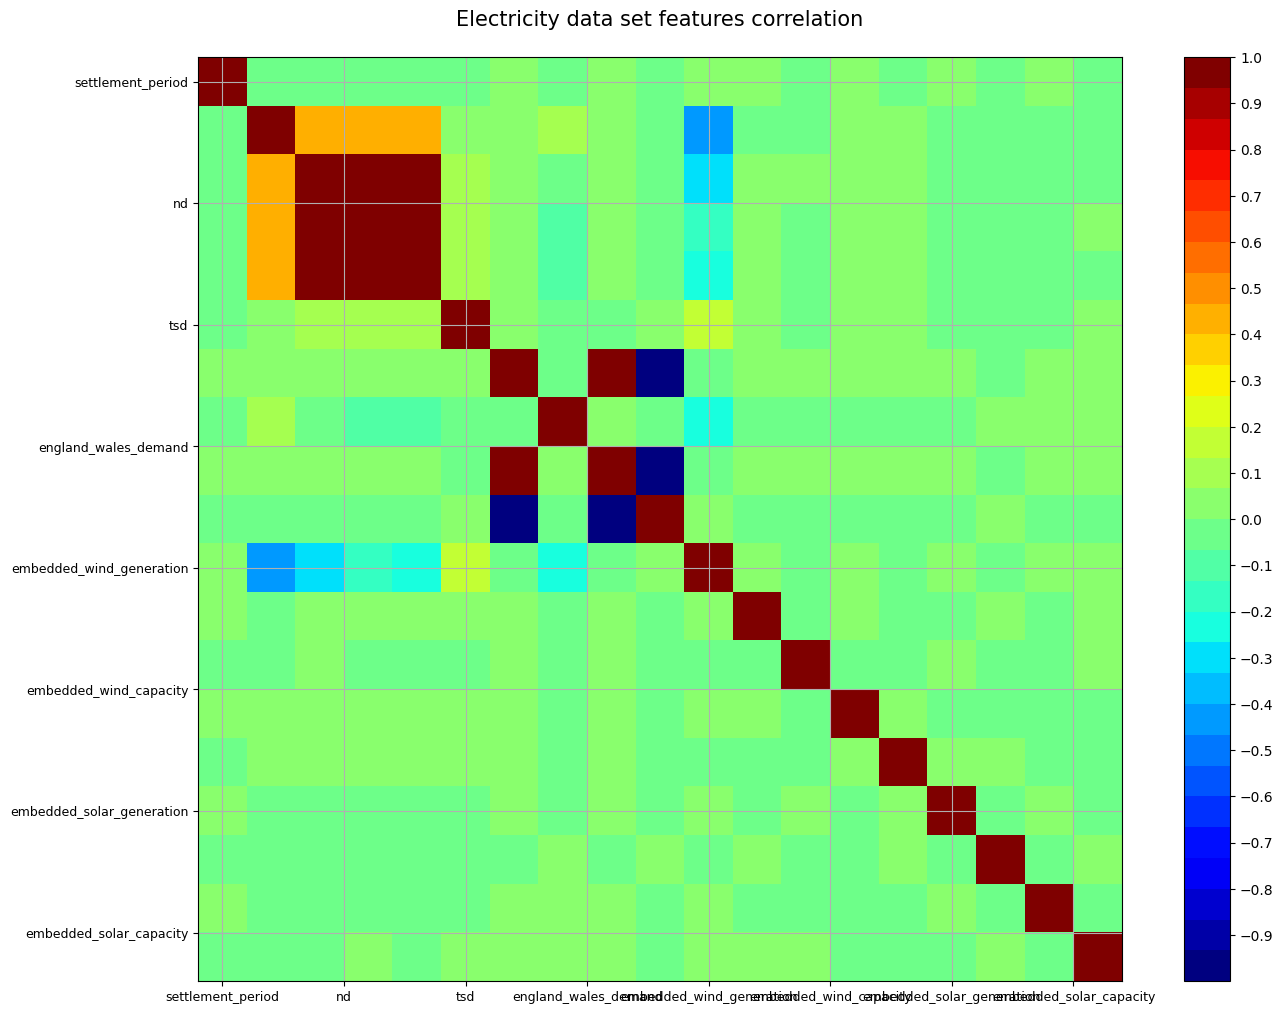

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import cm as cm

def correlation_matrix(df):
    fig = plt.figure(figsize=(16, 12))
    ax1 = fig.add_subplot(111)
    cmap = cm.get_cmap('jet', 30)
    cax = ax1.imshow(df.corr(), interpolation="nearest", cmap=cmap)
    ax1.grid(True)
    plt.title('Electricity data set features correlation\n', fontsize=15)
    labels = df.columns
    ax1.set_xticklabels(labels, fontsize=9)
    ax1.set_yticklabels(labels, fontsize=9)
    # Add colorbar, make sure to specify tick locations to match desired ticklabels
    fig.colorbar(cax, ticks=[0.1 * i for i in range(-11, 11)])
    plt.show()

# Load your dataset (assuming 'data' is defined elsewhere in your code)
# data = pd.read_csv("/content/drive/MyDrive/Machine Learning/historic_demand_year_2023.csv")

# Call the correlation_matrix function to visualize the correlation matrix
correlation_matrix(data)


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [ ]:
np.random.seed(0)
data = np.random.randn(100, 2)  # 100 data points with 2 features

In [ ]:
scaler = StandardScaler()
data = scaler.fit_transform(data)

In [ ]:
pca = PCA(n_components=2)  # You can choose the number of components you want
pca.fit(data)

PCA(n_components=2)

In [ ]:
components = pca.components_
explained_variance_ratio = pca.explained_variance_ratio_

In [ ]:
transformed_data = pca.transform(data)

In [ ]:
plt.figure(figsize=(10, 5))

<Figure size 1000x500 with 0 Axes>

<Figure size 1000x500 with 0 Axes>

Text(0, 0.5, 'Feature 2')

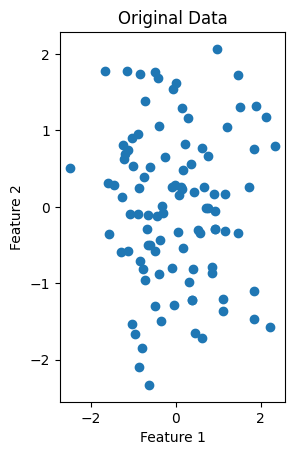

In [ ]:
plt.subplot(1, 2, 1)
plt.scatter(data[:, 0], data[:, 1])
plt.title('Original Data')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')

Text(0, 0.5, 'Principal Component 2')

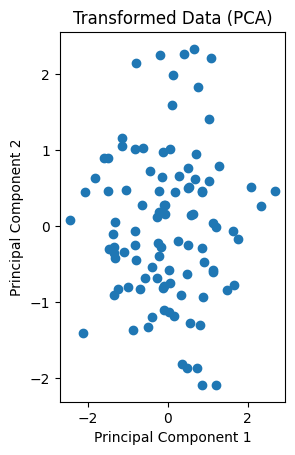

In [ ]:
plt.subplot(1, 2, 2)
plt.scatter(transformed_data[:, 0], transformed_data[:, 1])
plt.title('Transformed Data (PCA)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')


In [ ]:
print(f'Explained Variance Ratio: {explained_variance_ratio}')

Explained Variance Ratio: [0.5120026 0.4879974]


In [ ]:
plt.tight_layout()
plt.show()

<Figure size 640x480 with 0 Axes>